In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats

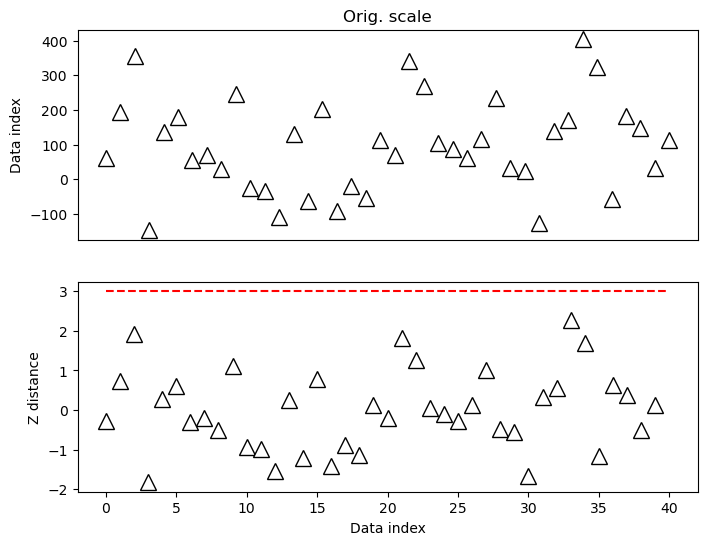

In [34]:
N = 40
data = np.random.randn(N)
data[data<-1] = data[data<-1]+2
data[data>2] = data[data>2]**2;
data = data*200 + 50

dataZ = (data-np.mean(data)) / np.std(data)

zscorethresh = 3

fix,ax = plt.subplots(2,1,figsize=(8,6))
ax[0].plot(data,'k^',markerfacecolor='w',markersize=12)
ax[0].set_xticks([])
ax[0].set_ylabel('Data index')
ax[0].set_title('Orig. scale')

ax[1].plot(dataZ,'k^',markerfacecolor='w',markersize=12)
ax[1].plot([0,N],[zscorethresh,zscorethresh],'r--')
ax[1].set_xlabel('Data index')
ax[1].set_ylabel('Z distance')
plt.show()

In [29]:
outliers = np.where(abs(dataZ)>zscorethresh)[0]

ax[0].plot(outliers,data[outliers],'x',color='r',markersize=20)
ax[1].plot(outliers,dataZ[outliers],'x',color='r',markersize=20)



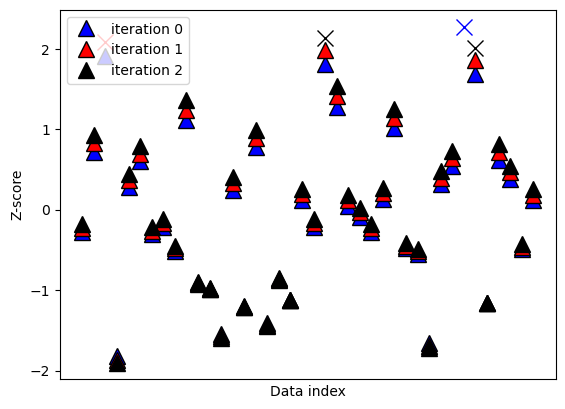

[ 2 21 33 34]


In [35]:
zscorethresh = 2
dataZ = (data-np.mean(data)) / np.std(data)

colorz = 'brkm'
numiters = 0
while True:
    datamean = np.nanmean(dataZ)
    datastd = np.nanstd(dataZ)
    dataZ = (dataZ-datamean) / datastd
    
    toremove = np.abs(dataZ)>zscorethresh
    
    if sum(toremove)==0:
        break
    else:
        plt.plot(np.where(toremove)[0],dataZ[toremove],'%sx'%colorz[numiters],markersize=12)
        dataZ[toremove] = np.nan
    
    plt.plot(dataZ,'k^',markersize=12,markerfacecolor=colorz[numiters],label='iteration %g'%numiters)
    numiters = numiters + 1
    
plt.xticks([])
plt.ylabel('Z-score')
plt.xlabel('Data index')
plt.legend()
plt.show()

removeFromOriginal = np.where(np.isnan(dataZ))[0]
print(removeFromOriginal)

In [36]:


dataMed = np.median(data)
dataMAD = robust.mad(data)

dataMz = stats.norm.ppf(.75)*(data-dataMed) / dataMAD

fix,ax = plt.subplots(2,1,figsize=(8,6))
ax[0].plot(data,'k^',markerfacecolor='w',markersize=12)
ax[0].set_xticks([])
ax[0].set_ylabel('Data index')
ax[0].set_title('Orig. scale')

ax[1].plot(dataZ,'k^',markerfacecolor='w',markersize=12)
ax[1].plot([0,N],[zscorethresh,zscorethresh],'r--')
ax[1].set_xlabel('Data index')
ax[1].set_ylabel('Median dev. units (Mz)')
plt.show()

NameError: name 'robust' is not defined